# Simulación 3

Decaimiento nuclear usando la distribución de Poisson


## Previo

Se importan los paquetes


In [2]:
import numpy as np
from scipy.stats import poisson
import matplotlib as mpl
import matplotlib.pyplot as plt

Se configuran las gráficas, tengase en cuenta que algunos pueden no cargar por dependencias a instalar pendientes.


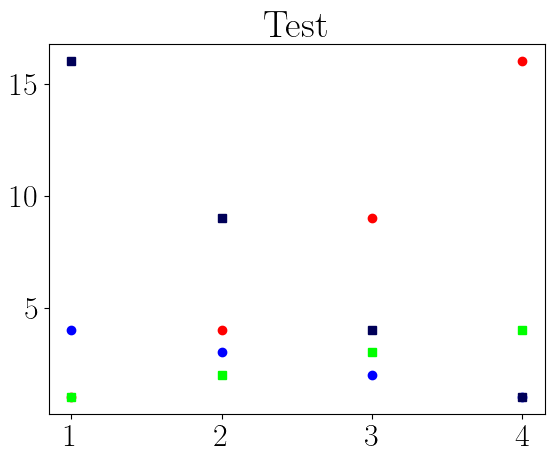

In [3]:
# plt.style.use("seaborn-v0_8-bright")
mpl.rcParams.update(
    {
        "legend.fontsize": 23,
        "axes.labelsize": 23,
        "xtick.labelsize": 23,
        "ytick.labelsize": 23,
        "text.usetex": True,
        "font.family": "Times New Roman",
        "mathtext.fontset": "dejavusans",
        "font.size": 23,
    }
)


def plot_template(title, x_label, y_label, x_lim=None, y_lim=None):
    """Genera la plantilla de graficación para mantener consistencia en el formato de cada gráfica única generada.

    Args:
        title (string): Aplica titulos.
        x_label (float): Título de eje x.
        y_label (float): Título de eje y.
        x_lim ([float], optional): Límite en eje x. Defaults to None.
        y_lim ([float], optional): Límite en eje y. Defaults to None.

    Returns:
        object: Devuelve los objetos de la gráfica modificados con la plantilla requerida
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title(title, fontsize=18)
    ax.set_xlabel(x_label, fontsize=16)
    ax.set_ylabel(y_label, fontsize=16)
    if x_lim is not None:
        ax.set_xlim(x_lim)
    if y_lim is not None:
        ax.set_ylim(y_lim)
    ax.grid(True, which="both", linestyle="--", alpha=0.7)
    fig.tight_layout()
    return fig, ax


# Set a custom color cycle (glasbeypalette)
colors = [
    "#ff0000",
    "#0000ff",
    "#00ff00",
    "#000058",
    "#942100",
    "#ff0092",
    "#006500",
    "#e5be01",
    "#ffd300",
    "#968000",
    "#ff0073",
    "#24007b",
    "#009292",
    "#c10087",
    "#1478e5",
    "#bea281",
    "#00ffc5",
    "#ff0000",
    "#7b0046",
    "#8c6640",
    "#01fffe",
    "#09007b",
    "#6e5300",
    "#825cdb",
    "#ac82ff",
    "#56ff7b",
    "#02ad23",
    "#8176d1",
    "#c87cff",
    "#70929b",
    "#ff9000",
    "#c248c0",
]
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)

# Test
if True:
    plt.plot([1, 2, 3, 4], [1, 4, 9, 16], "o")
    plt.plot([4, 3, 2, 1], [1, 2, 3, 4], "o")
    plt.plot([1, 2, 3, 4], [1, 2, 3, 4], "s")
    plt.plot([4, 3, 2, 1], [1, 4, 9, 16], "s")
    plt.title("Test")
    plt.show()

## 1. Simulación Base


Recordar que la probabilidad individual de decaimiento es dada por el factor $\Gamma$ como

$$\Gamma = \frac{p}{\Delta t}$$

Sabiendo la relación $\Gamma = 1 / \tau$, resulta

$$p = \frac{\Delta t}{\tau}$$


In [4]:
def poisson_decay(N0, tau, delta_t):
    r"""
    Simula el decaimiento nuclear usando la distribución de Poisson.

    Args:
        N0 (int): Número inicial de núcleos
        delta_t (float): Intervalo de tiempo :math:`\Delta t`.
        tau (float): Tiempo de vida medio de los núcleos :math:`\tau`.

    Returns:
        t_values: Tiempos :math:`t_i` en los que se evalúa la actividad.
        A_values: Actividad :math:`A(t_i)` en los tiempos :math:`t_i`.
        N_values: Número de núcleos restantes :math:`N(t_i)` en los tiempos :math:`t_i`.
        pmf_values: Distribuciones de probabilidad de Poisson en cada paso :math:`P_p(x)`.
        cdf_values: Funciones acumulativas de Poisson en cada paso :math:`F(x)`.
    """
    t_values = []
    A_values = []
    N_values = []
    pmf_values = []  # Para guardar la función de masa de probabilidad
    cdf_values = []  # Para guardar la función acumulativa

    N_t = N0
    t = 0

    while N_t > 0:
        # Calcular media de distribución Poisson
        mu = N_t * (delta_t / tau)

        # Generar número de decaimientos usando Poisson
        X = poisson.rvs(mu=mu)

        # Calcular actividad
        A_t = X / delta_t

        # Calcular PMF y CDF
        x = np.arange(0, N_t + 1)
        pmf = poisson.pmf(x, mu=mu)
        cdf = poisson.cdf(x, mu=mu)

        # Guardar valores para gráficos
        t_values.append(t)
        A_values.append(A_t)
        N_values.append(N_t)
        pmf_values.append(pmf)
        cdf_values.append(cdf)

        # Actualizar el número de núcleos restantes y el tiempo
        N_t -= X
        t += delta_t

    return (
        np.array(t_values),
        np.array(A_values),
        np.array(N_values),
        pmf_values,
        cdf_values,
    )


# test
if False:
    ps = poisson_decay(N0=1000, delta_t=1, tau=10)
    plt.plot(ps[0], ps[1], label="Actividad")

Se genera la visualización para **T4** donde $N(0) = 100, para el tiempo inicial $t_0 = 0$ y tiempo intermedio $t_m = (t_f - t_o)/2$


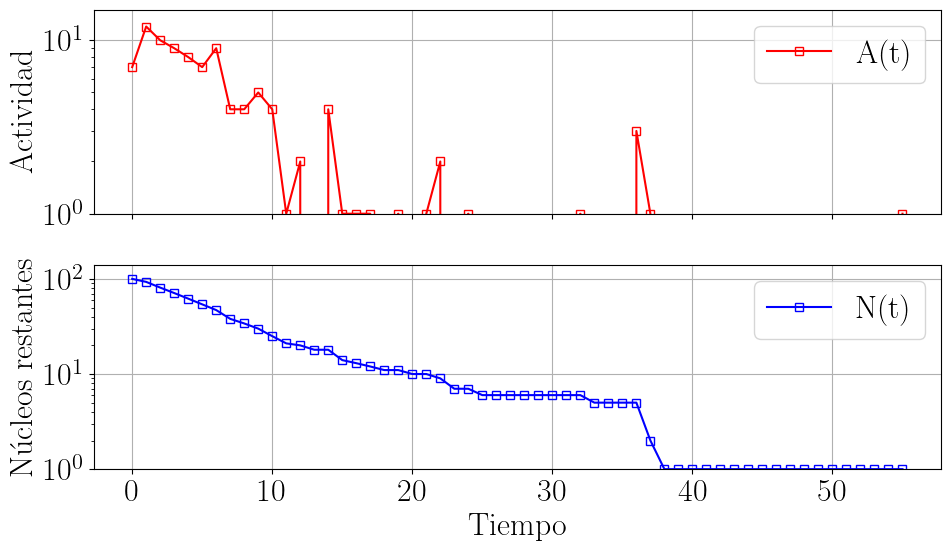

In [ ]:
# Parámetros iniciales
N0 = 100  # Número inicial de núcleos
tau = 10  # Tiempo de vida medio (arbitrario)
delta_t = 1  # Intervalo de tiempo

# Ejecutar la simulación
times, activities, nuclei_remaining, pmf_values, cdf_values = poisson_decay(
    N0, tau, delta_t
)

# Graficar resultados
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 6))


def plot_ending(fig, i):
    ax[i].set_yscale("log")
    ax[i].grid()
    ax[i].legend()
    ax[i].set_ylim(1, 1.1 * ax[i].get_ylim()[1])


# Gráfico de la actividad
ax[0].plot(times, activities, label="A(t)", marker="s", fillstyle="none")
ax[0].set_ylabel("Actividad")
plot_ending(fig, 0)

# Gráfico del número de núcleos restantes con color diferente
ax[1].plot(
    times, nuclei_remaining, label="N(t)", marker="s", fillstyle="none", color=colors[1]
)
ax[1].set_xlabel("Tiempo")
ax[1].set_ylabel("Núcleos restantes")
plot_ending(fig, 1)

plt.subplots_adjust(hspace=0)  # Ajustar el espacio entre subplots

fig.tight_layout()
# fig.savefig("T4_nuclear_decay.png", dpi=300)
plt.show()

**T2**
delta_t = 1 # Intervalo de tiempo
**T3**
μ=N(t)⋅ τ/Δt; p= τ/Δt


T4, T5 y T6


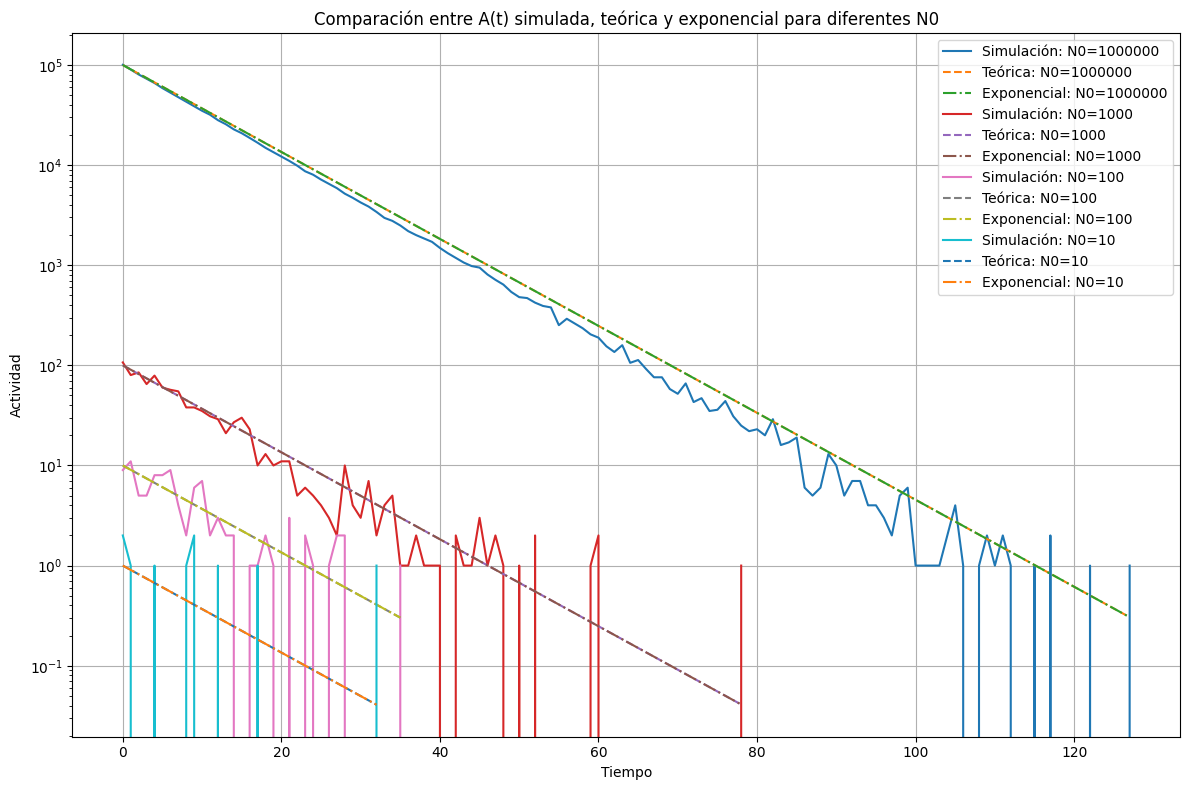

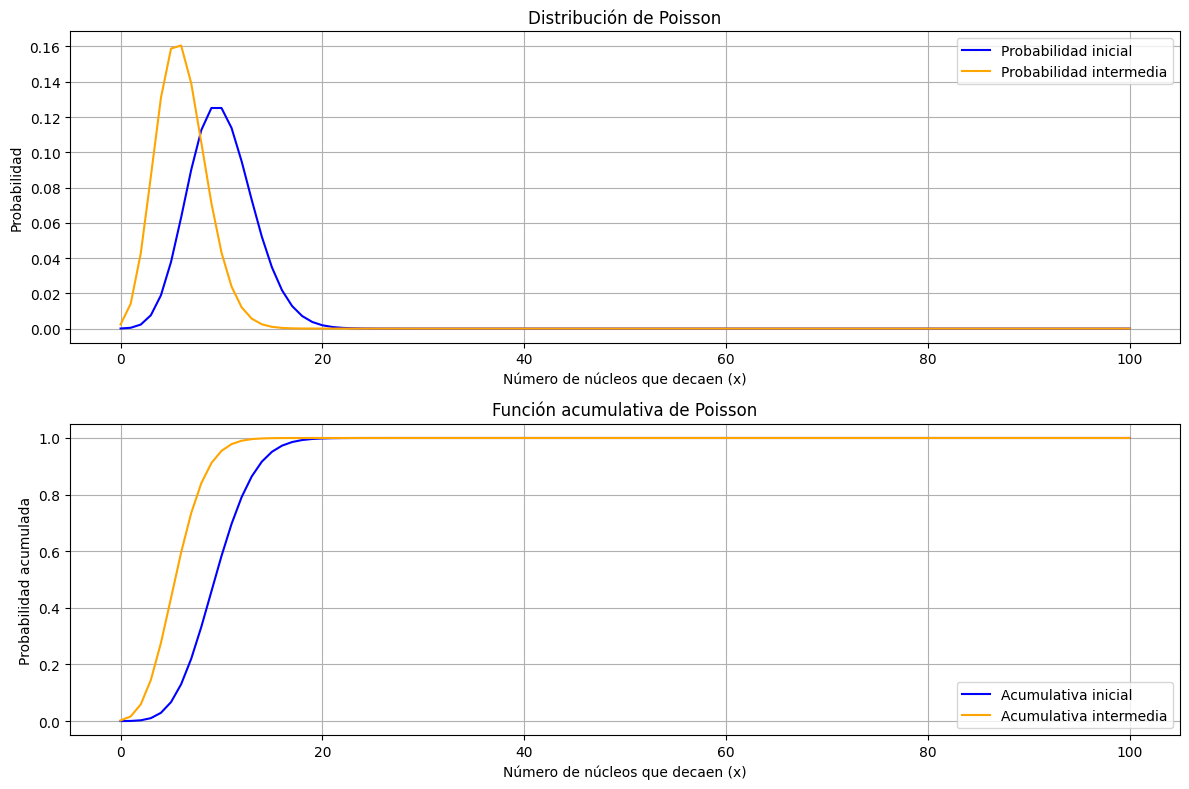

In [ ]:
# Parámetros iniciales
N_values = [10**6, 10**3, 100, 10]  # Diferentes valores iniciales de núcleos
tau = 10  # Tiempo de vida medio (arbitrario)
delta_t = 1  # Intervalo de tiempo

# Generar gráficos para los diferentes T en el archivo original
plt.figure(figsize=(12, 8))

for i, N0 in enumerate(N_values):
    times, activities, nuclei_remaining = poisson_decay(N0, tau, delta_t)
    theoretical_activity = [N0 * np.exp(-t / tau) / tau for t in times[:-1]]
    exponential_activity = [N0 / tau * np.exp(-t / tau) for t in times[:-1]]

    # Gráfico de la actividad simulada, teórica y exponencial
    plt.plot(times[:-1], activities, label=f"Simulación: N0={N0}")
    plt.plot(
        times[:-1], theoretical_activity, linestyle="--", label=f"Teórica: N0={N0}"
    )
    plt.plot(
        times[:-1], exponential_activity, linestyle="-.", label=f"Exponencial: N0={N0}"
    )

plt.xlabel("Tiempo")
plt.ylabel("Actividad")
plt.title("Comparación entre A(t) simulada, teórica y exponencial para diferentes N0")
plt.grid()
plt.legend()
plt.yscale("log")  # Escala semi-logarítmica
plt.tight_layout()
plt.savefig("grafica_T6_combined.png")  # Guardar la gráfica como archivo PNG
plt.show()

# Implementación del T4
N0_T4 = 100  # Usamos N(0) = 100 para este análisis
initial_time = 0
intermediate_time = 5

# Calcular la distribución de Poisson para tiempos inicial y intermedio
mu_initial = N0_T4 * (delta_t / tau)
mu_intermediate = N0_T4 * np.exp(-intermediate_time / tau) * (delta_t / tau)

x_values = np.arange(0, N0_T4 + 1)

# Distribuciones de Poisson
poisson_initial = poisson.pmf(x_values, mu_initial)
poisson_intermediate = poisson.pmf(x_values, mu_intermediate)

# Funciones acumulativas
cumulative_initial = poisson.cdf(x_values, mu_initial)
cumulative_intermediate = poisson.cdf(x_values, mu_intermediate)

plt.figure(figsize=(12, 8))

# Gráfico de probabilidades
plt.subplot(2, 1, 1)
plt.plot(x_values, poisson_initial, label="Probabilidad inicial", color="blue")
plt.plot(
    x_values, poisson_intermediate, label="Probabilidad intermedia", color="orange"
)
plt.xlabel("Número de núcleos que decaen (x)")
plt.ylabel("Probabilidad")
plt.title("Distribución de Poisson")
plt.legend()
plt.grid()

# Gráfico de funciones acumulativas
plt.subplot(2, 1, 2)
plt.plot(x_values, cumulative_initial, label="Acumulativa inicial", color="blue")
plt.plot(
    x_values, cumulative_intermediate, label="Acumulativa intermedia", color="orange"
)
plt.xlabel("Número de núcleos que decaen (x)")
plt.ylabel("Probabilidad acumulada")
plt.title("Función acumulativa de Poisson")
plt.legend()
plt.grid()

plt.tight_layout()
plt.savefig("grafica_T4.png")  # Guardar la gráfica como archivo PNG
plt.show()

T5 T6 y T7


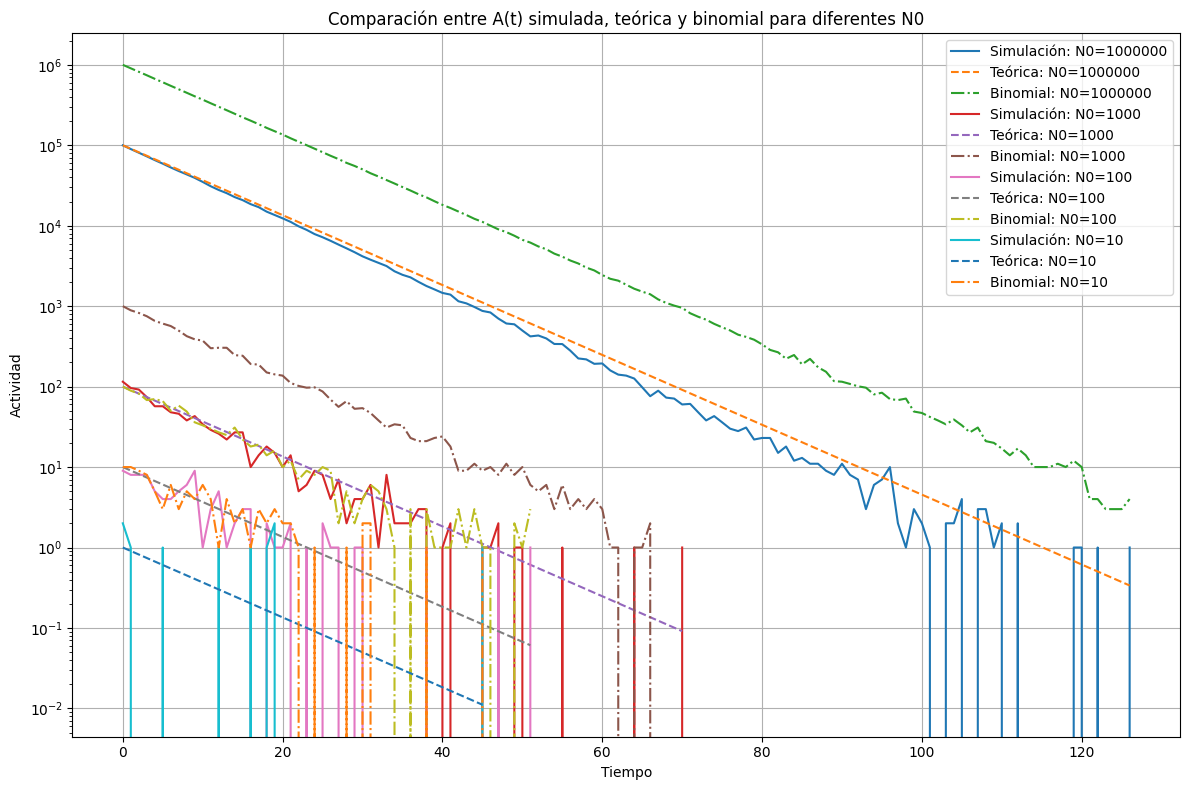

In [ ]:
import numpy as np
from scipy.stats import poisson, expon, binom
import matplotlib.pyplot as plt


def simulate_decay(N0, tau, delta_t):
    """
    Simula el decaimiento nuclear usando la distribución de Poisson.

    Args:
        N0 (int): Número inicial de núcleos.
        tau (float): Tiempo de vida medio de los núcleos.
        delta_t (float): Intervalo de tiempo.

    Returns:
        times (list): Tiempos en los que se evalúa la actividad.
        activities (list): Actividad A(t) en cada instante.
        nuclei_remaining (list): Número de núcleos restantes en cada instante.
    """
    # Inicialización
    times = [0]
    activities = []
    nuclei_remaining = [N0]

    current_nuclei = N0

    while current_nuclei > 0:
        # Calcular la media de la distribución de Poisson
        mu = current_nuclei * (delta_t / tau)

        # Generar el número de decaimientos usando Poisson
        decayed_nuclei = poisson.rvs(mu)

        # Actualizar actividad y núcleos restantes
        activity = decayed_nuclei / delta_t
        current_nuclei -= decayed_nuclei

        # Guardar los resultados
        times.append(times[-1] + delta_t)
        activities.append(activity)
        nuclei_remaining.append(max(current_nuclei, 0))

    return times, activities, nuclei_remaining


# Parámetros iniciales
N_values = [10**6, 10**3, 100, 10]  # Diferentes valores iniciales de núcleos
tau = 10  # Tiempo de vida medio (arbitrario)
delta_t = 1  # Intervalo de tiempo

# Generar gráficos para T7
plt.figure(figsize=(12, 8))

for i, N0 in enumerate(N_values):
    times, activities, nuclei_remaining = simulate_decay(N0, tau, delta_t)
    theoretical_activity = [N0 * np.exp(-t / tau) / tau for t in times[:-1]]

    # Simulación usando distribución binomial
    binomial_activity = [
        binom.rvs(n=N0, p=np.exp(-t / tau)) / delta_t for t in times[:-1]
    ]

    # Gráfico de la actividad simulada, teórica y binomial
    plt.plot(times[:-1], activities, label=f"Simulación: N0={N0}")
    plt.plot(
        times[:-1], theoretical_activity, linestyle="--", label=f"Teórica: N0={N0}"
    )
    plt.plot(times[:-1], binomial_activity, linestyle="-.", label=f"Binomial: N0={N0}")

plt.xlabel("Tiempo")
plt.ylabel("Actividad")
plt.title("Comparación entre A(t) simulada, teórica y binomial para diferentes N0")
plt.grid()
plt.legend()
plt.yscale("log")  # Escala semi-logarítmica
plt.tight_layout()
plt.savefig("grafica_T7.png")  # Guardar la gráfica como archivo PNG
plt.show()